In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')


In [4]:
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Explore Data and Data Cleaning

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.isna().sum()


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<Axes: >

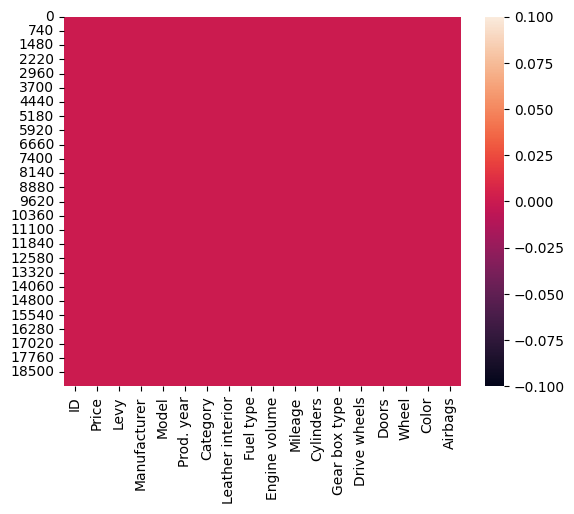

In [7]:
sns.heatmap(df.isna())


In [8]:
df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [9]:
df.duplicated().sum()


313

In [11]:
df.drop_duplicates(inplace = True)


In [12]:
df.duplicated().sum()


0

Analysis and Preprocessing Data

In [13]:
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [14]:
for col in df.columns :
    print(f'Category {col} is : {df[col].nunique()} ')

Category ID is : 18924 
Category Price is : 2315 
Category Levy is : 559 
Category Manufacturer is : 65 
Category Model is : 1590 
Category Prod. year is : 54 
Category Category is : 11 
Category Leather interior is : 2 
Category Fuel type is : 7 
Category Engine volume is : 107 
Category Mileage is : 7687 
Category Cylinders is : 13 
Category Gear box type is : 4 
Category Drive wheels is : 3 
Category Doors is : 3 
Category Wheel is : 2 
Category Color is : 16 
Category Airbags is : 17 


In [15]:
df.Manufacturer.unique()


array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [16]:
df.Manufacturer.nunique()


65

In [17]:
df.Manufacturer.value_counts().sum()


18924

In [18]:
df = df.drop(['ID','Doors'], axis =1 )


In [19]:
df


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4


Levy => we need to replacing '-'

In [20]:
df['Levy'].info()


<class 'pandas.core.series.Series'>
Index: 18924 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype 
--------------  ----- 
18924 non-null  object
dtypes: object(1)
memory usage: 295.7+ KB


In [21]:
df['Levy'] = df['Levy'].replace('-','0')


In [22]:
df['Levy'] =df['Levy'].astype('int')


In [23]:
df['Levy'].info()


<class 'pandas.core.series.Series'>
Index: 18924 entries, 0 to 19236
Series name: Levy
Non-Null Count  Dtype
--------------  -----
18924 non-null  int64
dtypes: int64(1)
memory usage: 295.7 KB


In [24]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
df['Engine volume'] = df['Engine volume'].astype('float64')

In [25]:
df['Engine volume']


0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: float64

In [26]:
df['Mileage'] =df['Mileage'].str.replace('km','')


In [27]:
df['Mileage'] =df['Mileage'].astype('int')


In [28]:
df['Mileage']


0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 18924, dtype: int64

In [29]:
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']

In [ ]:
df =df.drop('Prod. year',axis=1)


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int64  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int64  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Age               18924 non-null  int64  
dty

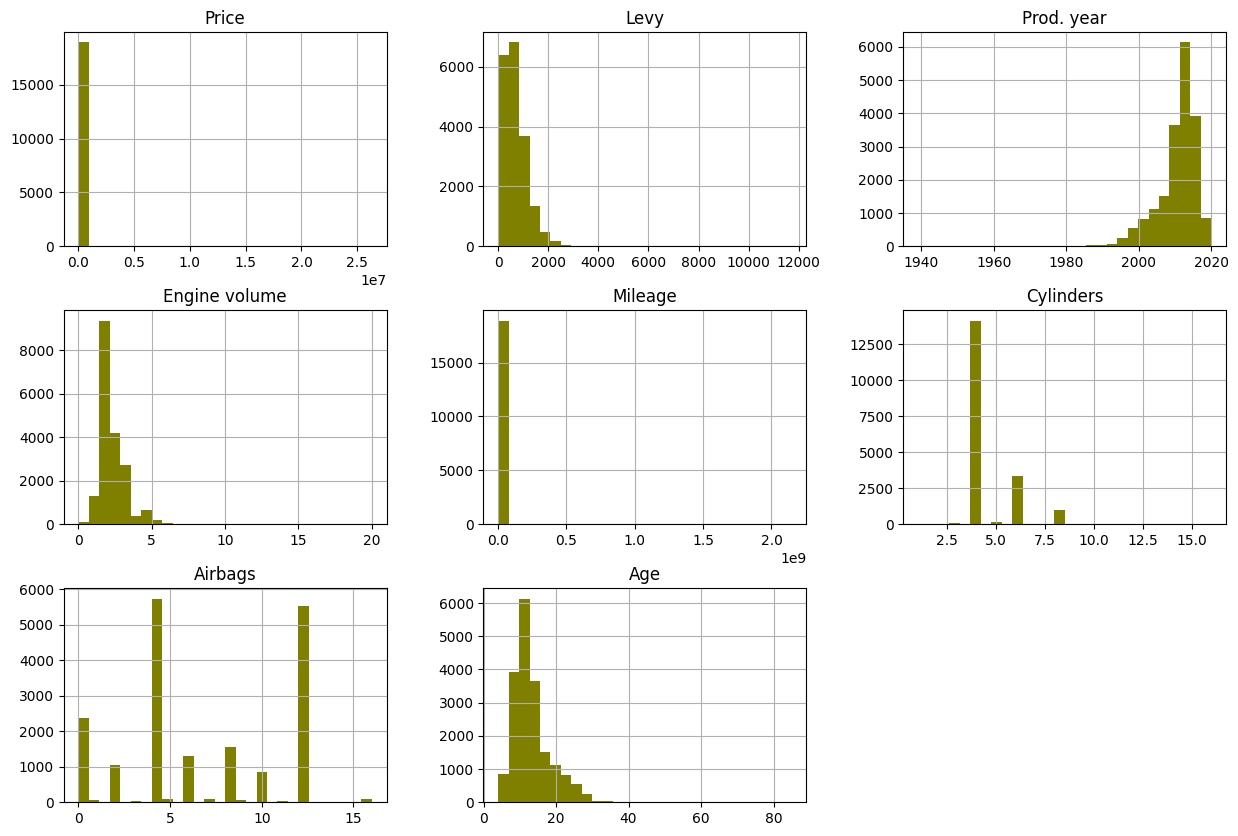

In [31]:
df.hist(bins = 28, figsize=(15, 10), color ='olive')

plt.show()

in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

In [32]:
df.Manufacturer.value_counts()[:5]


Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
Name: count, dtype: int64

In [33]:
top5cars= df.Manufacturer.value_counts()[:10]
top5cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

In [34]:
top10meancars =[df[df['Manufacturer' ]== i]['Price'].mean() for i in list(top5cars.index)]
top10meancars

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

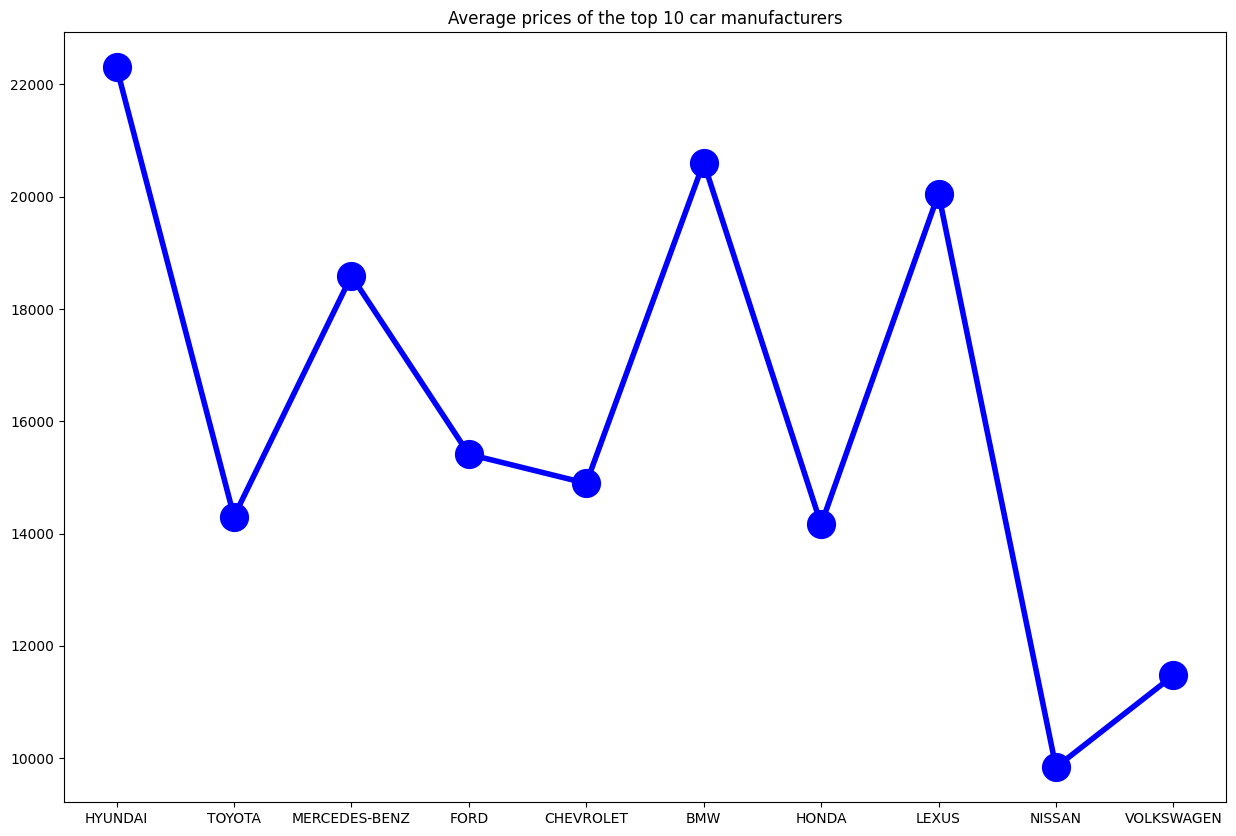

In [35]:
plt.figure(figsize=(15,10))
plt.plot(top5cars.index,top10meancars ,color='blue',
         linewidth = 4,marker='o',markersize = 20)

plt.title('Average prices of the top 10 car manufacturers')
plt.show()

Average prices of the top 10 car manufacturers

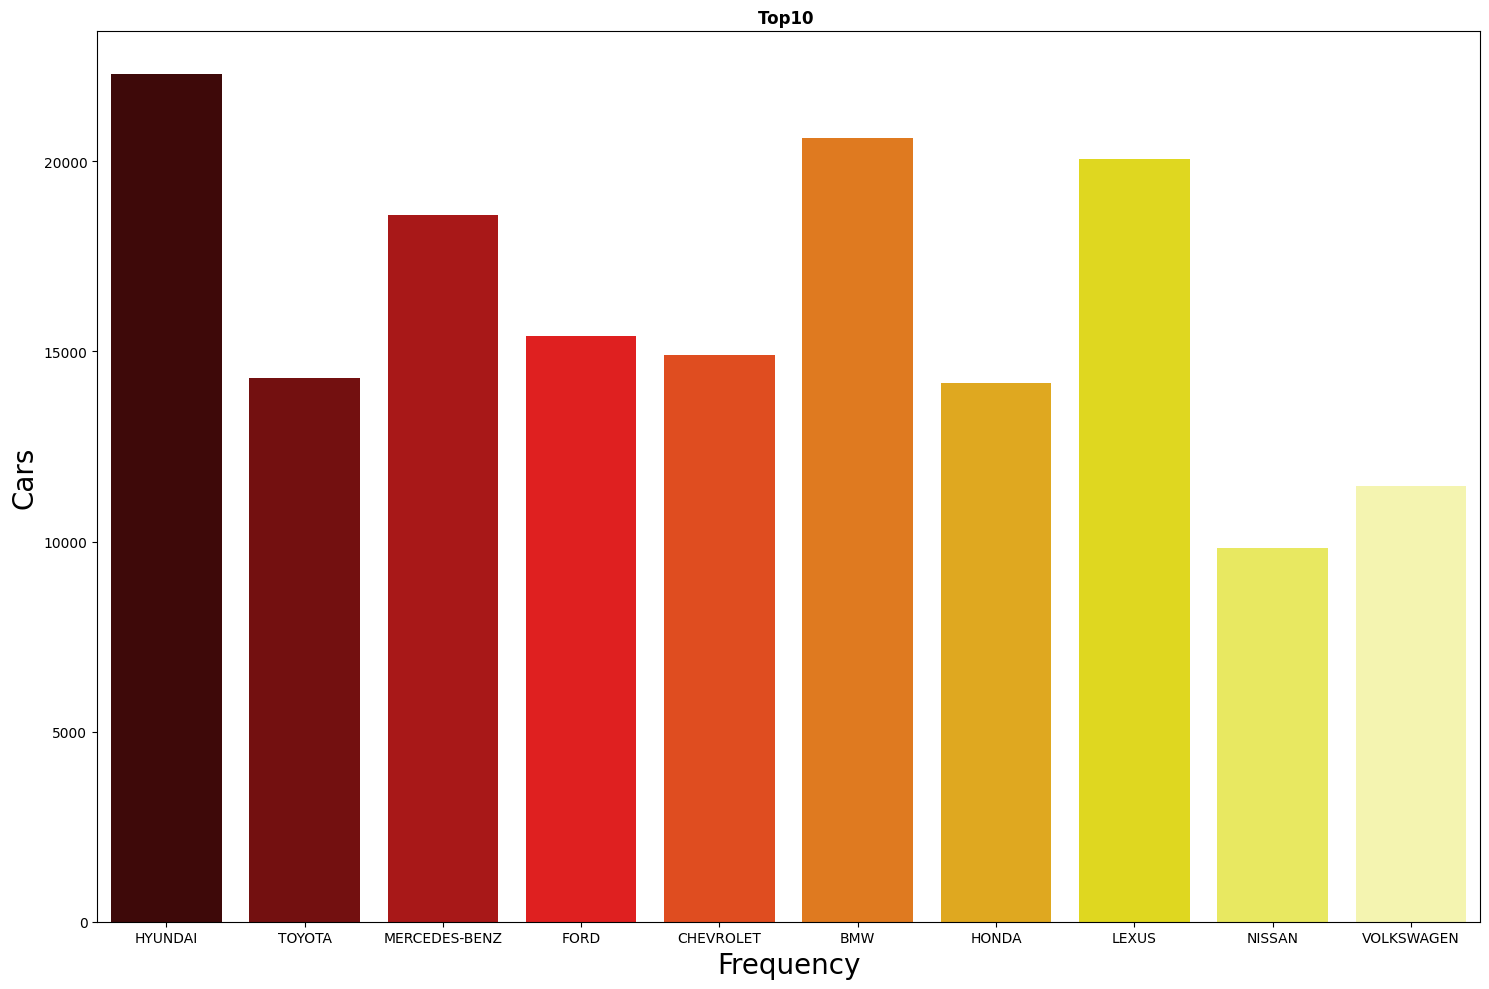

In [36]:
plt.figure(figsize=(15, 10))
sns.barplot(x=top5cars.index, y=top10meancars,palette='hot',linewidth = 3)
plt.title('Top10 ',loc='center',fontweight='bold')
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

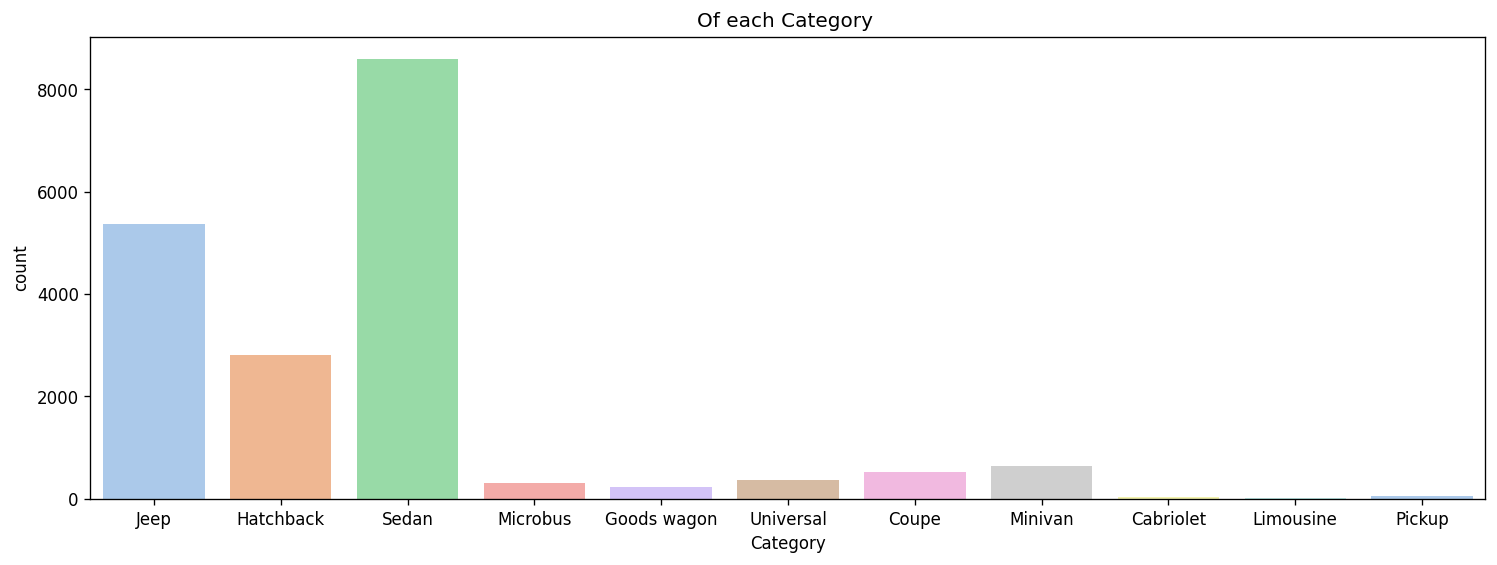

In [37]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category',palette='pastel')
plt.title("Of each Category ")
plt.show()

Most types of Categories are Sedan, Hatchback, and Jeep.

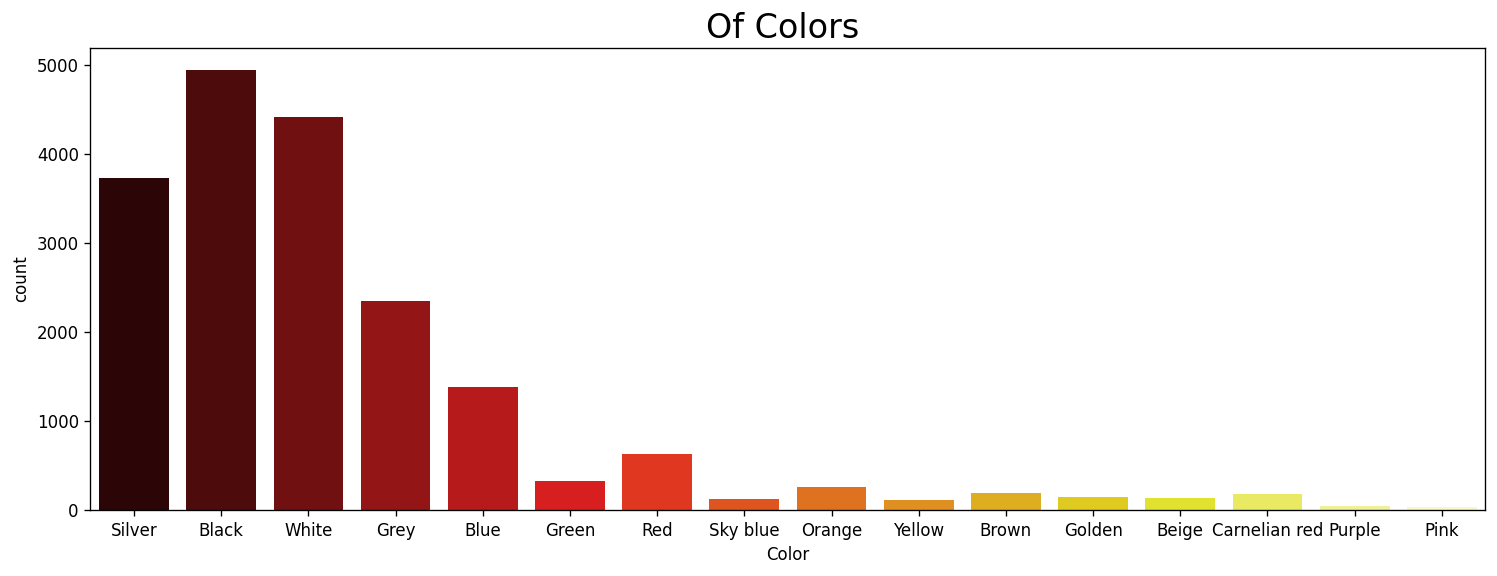

In [38]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Color',palette='hot')
plt.title("Of Colors ",fontsize=20)
plt.show()

The most sold car colors are Black And Silver,White And Grey.

In [40]:
colunmss= df.select_dtypes(include='object')


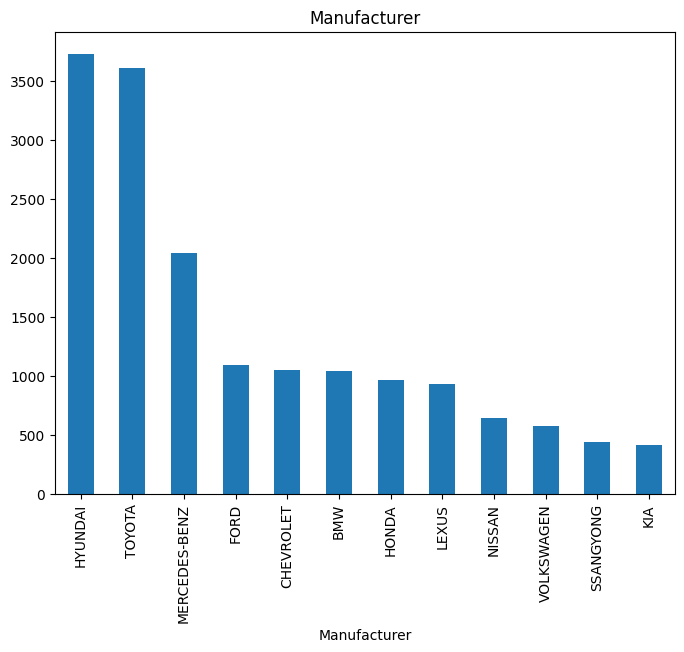

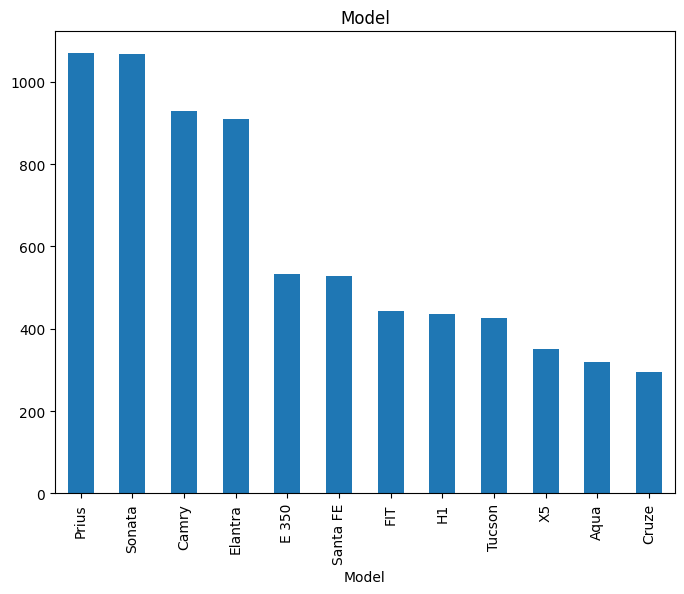

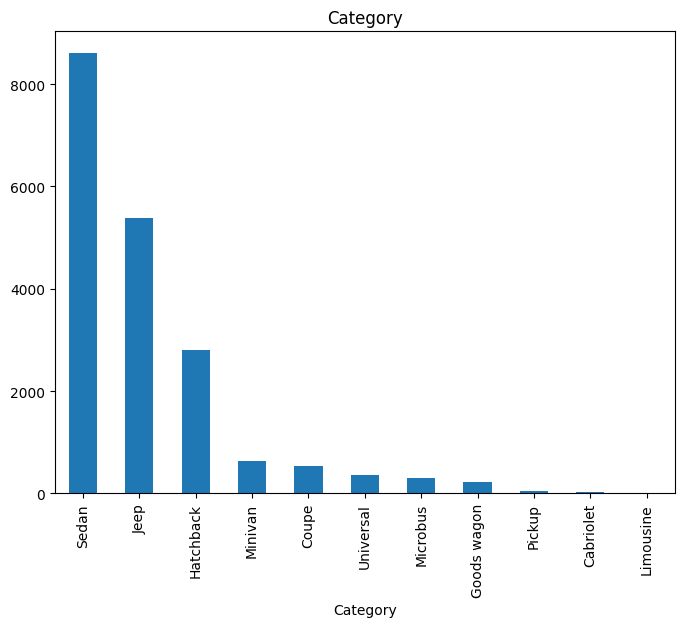

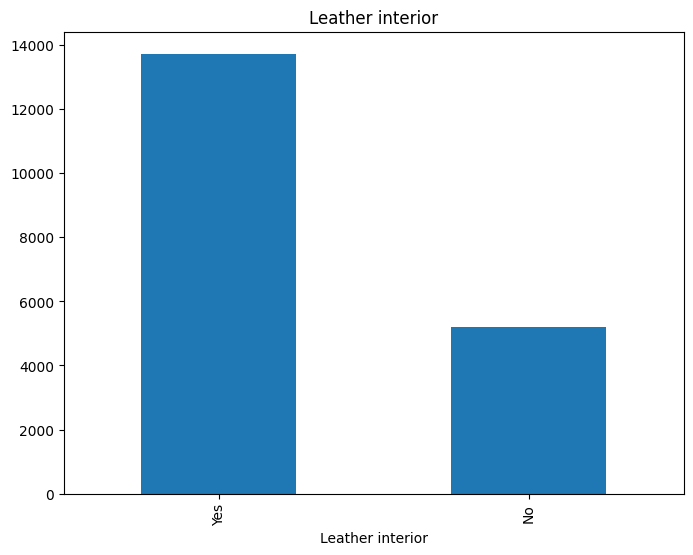

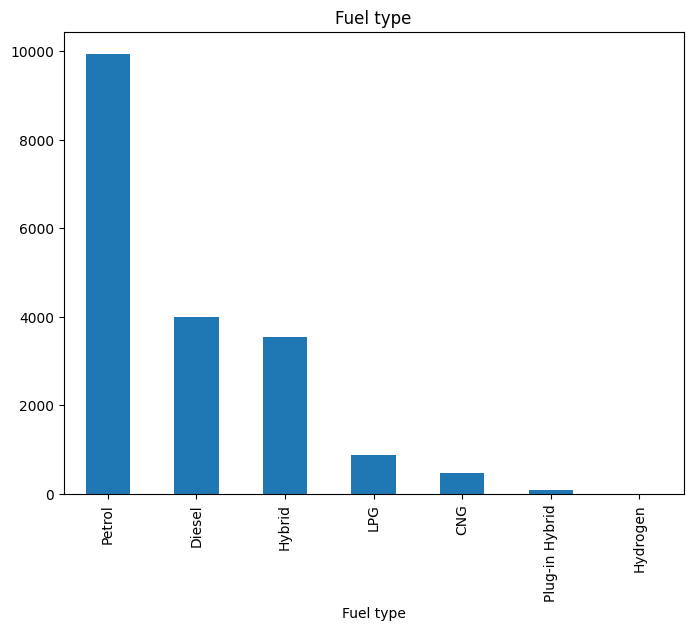

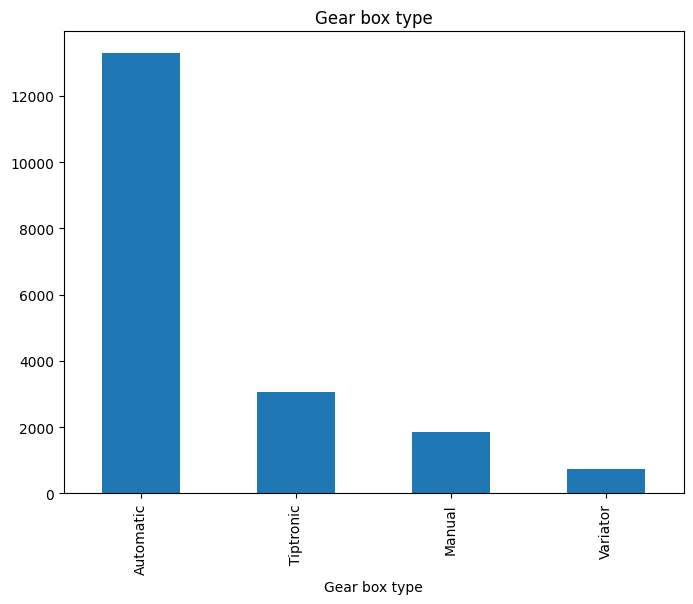

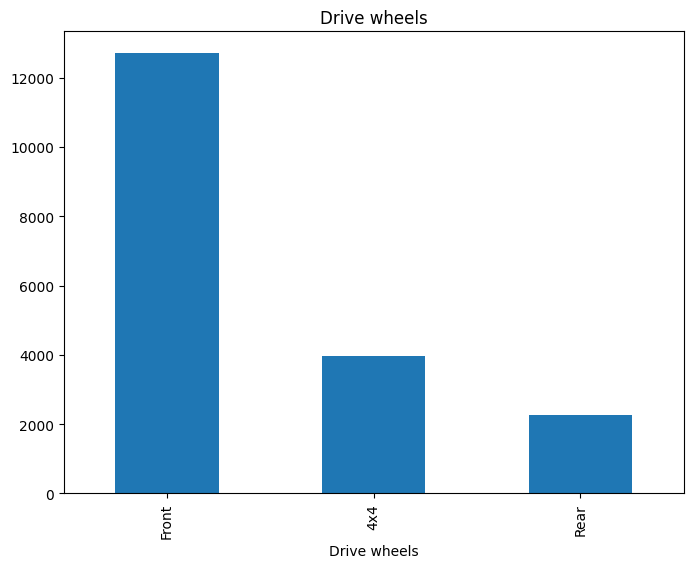

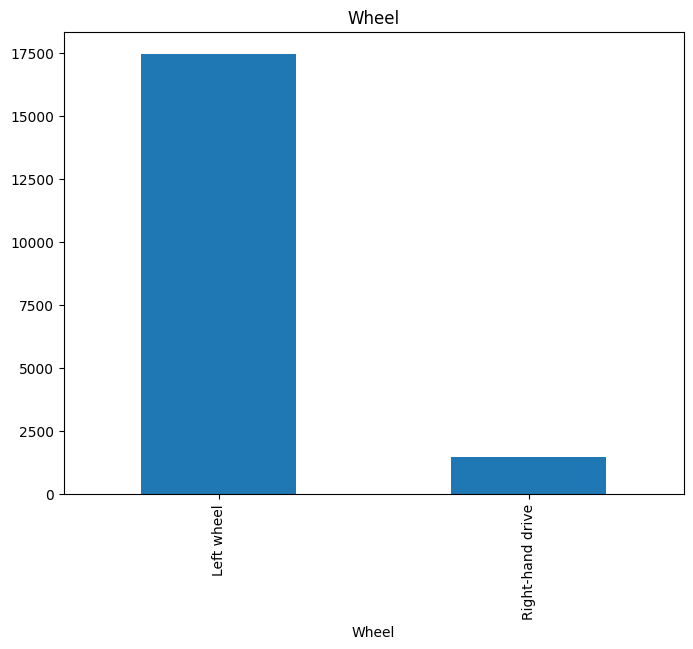

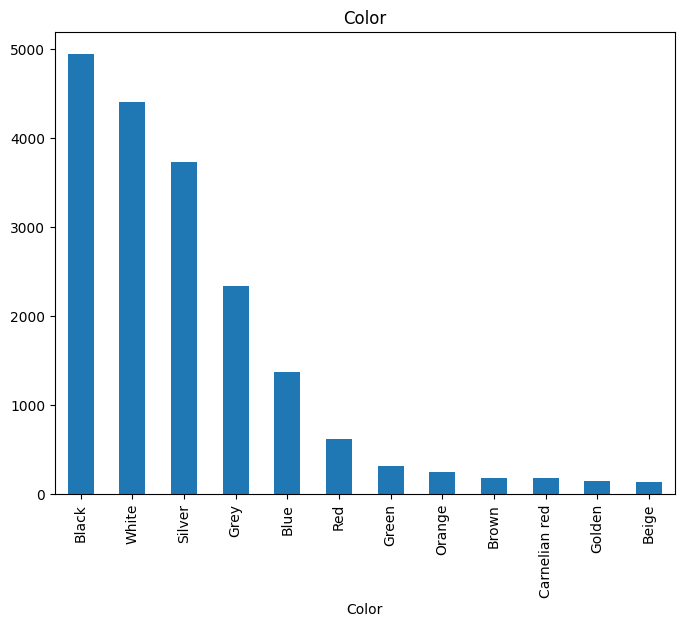

In [41]:
# colunms = ['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for i in colunmss :
    plt.figure(figsize=(8, 6))
    top10 = df[i].value_counts()[:12]
    top10.plot(kind = 'bar')
    plt.title(i)
    plt.show()

In [42]:
corr= df.select_dtypes(exclude=object).corr()
corr

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.012689,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.362827,0.378117,-0.021203,0.251632,0.125015,-0.362827
Prod. year,0.012689,0.362827,1.000000,-0.032427,-0.064058,-0.099443,0.235160,-1.000000
Engine volume,0.008888,0.378117,-0.032427,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.064058,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,-0.099443,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.235160,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,-1.000000,0.032427,0.064058,0.099443,-0.235160,1.000000


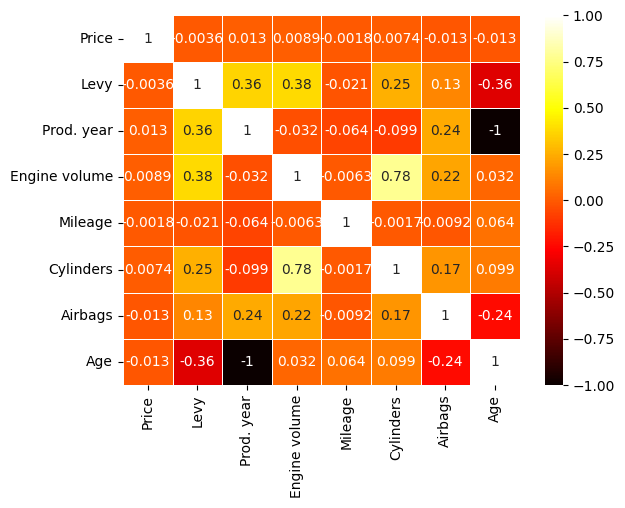

In [43]:
sns.heatmap(corr, annot= True, linewidths= 0.5,cmap='hot')

plt.show()

final result¶
we have DataSet => Car Price
The Shape DataSet = (Rows = 205, columns = 26)

No null value

No Duplicated value Some Analyst Price cars Avg price = $13,276 💵

Min price = $5,118 💲

Max price = $45,400 💲💲

The famous or repeats car > Toyota Most using car working in Gas around 90% and the average price less than the car working in Diesel. some category using the car working in Diesel around 10%, but the average price is more than the car working on Gas.

Most cars stand around 82%, also the average price less for Turbo, with turbo cars comprising around 18%.

Approximately 56% of users drive cars with 4 doors, while 46% drive cars with 2 doors; sports cars maintain a similar average price.

Most people prefer the Sedan car type, while higher-priced types like Convertible and Hardtop are also popular choices. Majority of users opt for [Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.

The most common engine type is "ohc," correlating with lower prices.

When increasing the number of cylinders, the price tends to increase, though the majority of users stick with 4 cylinders. As the engine size increases, so does the price. The wheelbase, car length, and car width have an effect on the price, but the car height doesn't seem to have any significant impact.

Outlier Data

In [44]:
numeric_data = df.select_dtypes(exclude=object)
numeric_data 

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,13328,1399,2010,3.5,186005,6.0,12,14
1,16621,1018,2011,3.0,192000,6.0,8,13
2,8467,0,2006,1.3,200000,4.0,2,18
3,3607,862,2011,2.5,168966,4.0,0,13
4,11726,446,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...
19232,8467,0,1999,2.0,300000,4.0,5,25
19233,15681,831,2011,2.4,161600,4.0,8,13
19234,26108,836,2010,2.0,116365,4.0,4,14
19235,5331,1288,2007,2.0,51258,4.0,4,17


In [47]:
for col in numeric_data:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    
    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)).sum()
    
    # Calculate total number of data points
    total_points = numeric_data[col].shape[0]
    
    # Print the number and percentage of outliers
    
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Price: 1055 -- 5.57%
Total Outliers in Levy: 160 -- 0.85%
Total Outliers in Prod. year: 962 -- 5.08%
Total Outliers in Engine volume: 1358 -- 7.18%
Total Outliers in Mileage: 635 -- 3.36%
Total Outliers in Cylinders: 4765 -- 25.18%
Total Outliers in Airbags: 0 -- 0.0%
Total Outliers in Age: 962 -- 5.08%


In [48]:
if outliers>0:
    df = df.loc[(df[col]<=upper_bound) & (df[col]>=lower_bound) ]


Transform Data

In [49]:
objdata= df.select_dtypes(include=object)
unobjdata = df.select_dtypes(exclude=object)

In [50]:
for i in range(0,objdata.shape[1]):
    objdata.iloc[:,i] = lab.fit_transform(objdata.iloc[:,i])

In [51]:
df= pd.concat([objdata,unobjdata],axis=1)


In [52]:
df

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Age
0,32,1136,4,1,2,0,0,0,12,13328,1399,2010,3.5,186005,6.0,12,14
1,8,586,4,0,5,2,0,0,1,16621,1018,2011,3.0,192000,6.0,8,13
2,21,610,3,0,5,3,1,1,1,8467,0,2006,1.3,200000,4.0,2,18
3,16,589,4,1,2,0,0,0,14,3607,862,2011,2.5,168966,4.0,0,13
4,21,610,3,1,5,0,1,0,12,11726,446,2014,1.3,91901,4.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,36,530,9,1,1,0,2,0,7,5802,1055,2013,3.5,107800,6.0,12,11
19233,23,1213,9,1,5,2,1,0,11,15681,831,2011,2.4,161600,4.0,8,13
19234,23,1312,4,1,1,0,1,0,7,26108,836,2010,2.0,116365,4.0,4,14
19235,8,396,4,1,1,0,1,0,1,5331,1288,2007,2.0,51258,4.0,4,17


Create Models

In [57]:
x= df.drop('Price',axis=1)
y= df['Price']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=40)


In [59]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestRegressor','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [60]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()
model6 = XGBRegressor()

In [61]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    acc = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(acc)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of model is :{score}')

In [62]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of model is :0.22266799097312262
The Score of model is :0.5087025402724019
The Score of model is :0.7449740156356954
The Score of model is :0.5136469276219987
The Score of model is :-0.03148501974024387


In [63]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.222668,15666.774356
1,DecisionTreeClassifier,0.508703,12455.138810
2,RandomForestRegressor,0.744974,8973.637650
3,GradientBoostingRegressor,0.513647,12392.306450
4,SVR,-0.031485,18047.114564


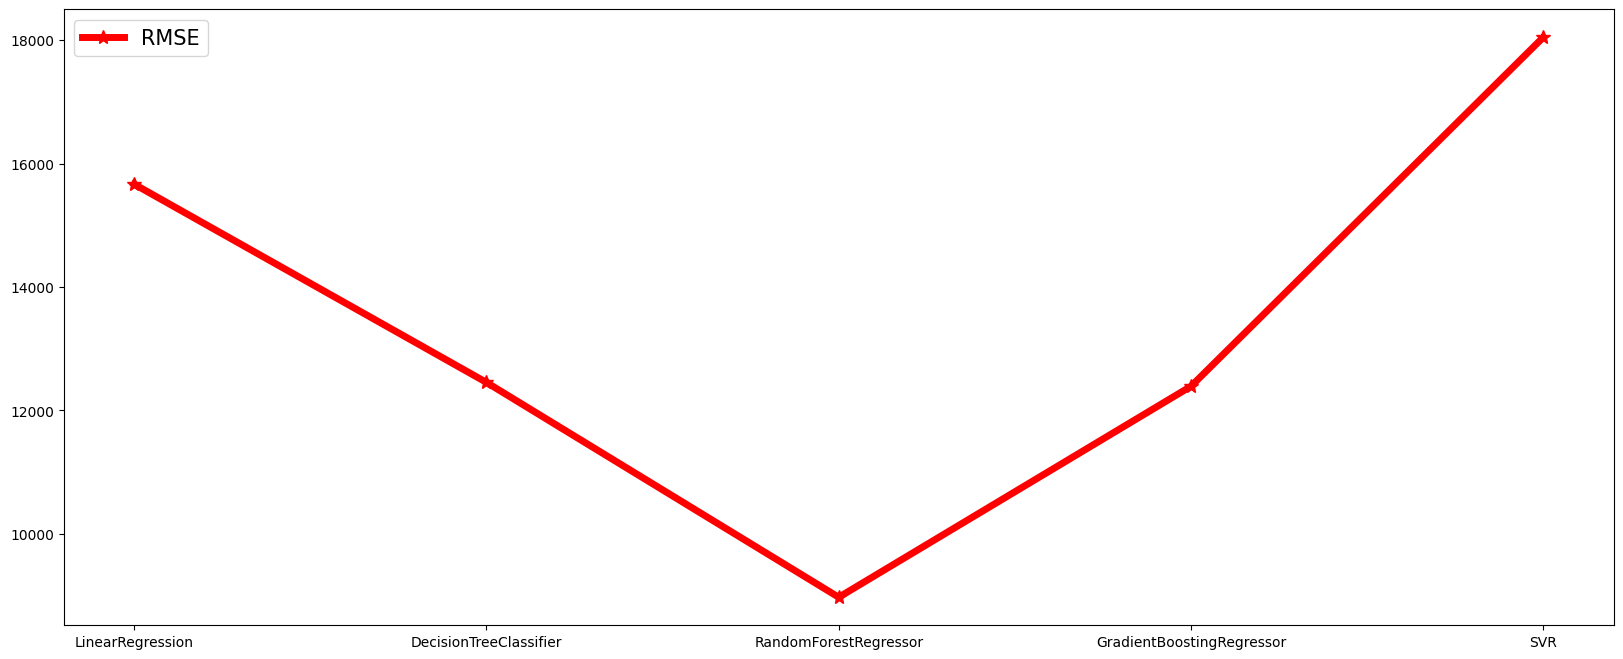

In [64]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.RMSE ,label='RMSE',lw=5,color='r',marker='*',markersize = 10)
plt.legend(fontsize=15)
plt.show()

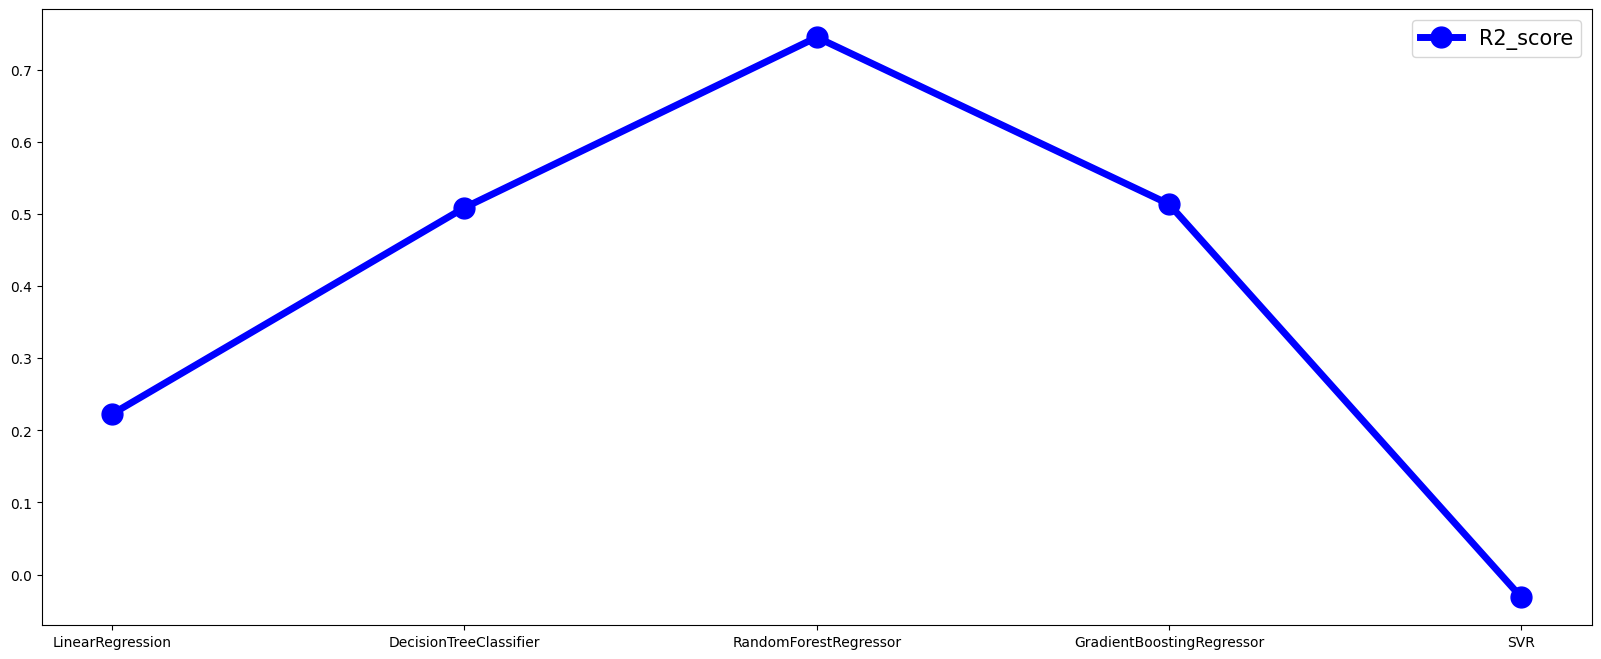

In [65]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.R2_score ,label='R2_score',lw=5,color='b',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.show()

the Difference between prediction and actual value in model => RandomForestRegressor¶


In [66]:
pre = model3.predict(x_test)


In [67]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pre,'Difference':y_test-pre})
pred_df.head()

,Actual Value,Predicted Value,Difference
16738,15681,15681.0000,0.0000
2324,27284,27284.0000,0.0000
13648,6899,9218.5900,-2319.5900
6002,8781,21774.5000,-12993.5000
16644,19287,17206.8525,2080.1475


the best model is RandomForestRegressor¶